<center><h1> Projet Deep Learning<h1></center>
<center><h5>Fabien HOS - MASTER2 MEDAS - CNAM<h5></center>

In [30]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

# Tensorflow & Keras 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from kerastuner.tuners import Hyperband


Dans ce projet, nous allons chercher √† pr√©dire correctement les 10 classes de v√™tements du jeu de donn√©es FASHION_MNIST.
Nous allons pour cela comparer plusieurs mod√®les, nous commen√ßerons par utiliser la r√©gression logistique (un mod√®le y ressemblant), puis le MLP et enfin le CNN. Pour comparer les mod√®les entre eux, nous utiliserons la m√©trique suivante : <b>la pr√©cision.</b>

In [32]:
# convert class vectors to binary class matrices
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
# Affichage des formes des datasets pour comprendre la structure
print("Training set shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test set shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Training set shape: (60000, 28, 28)
Training labels shape: (60000,)
Test set shape: (10000, 28, 28)
Test labels shape: (10000,)


On commence par importer le jeu de donn√©es puis on regarde leurs formes, nous voyons que le jeu de donn√©es est compos√© de 60 000 images pour l'apprentissage et 10 000 de test. Leur forme de 28x28 pixels.

Dans la cellule ci-dessous, on peut √©ventuellement regarder √† quoi ressemble nos images, nous voyons ici : une chaussure et deux t-shirt en niveau de gris.

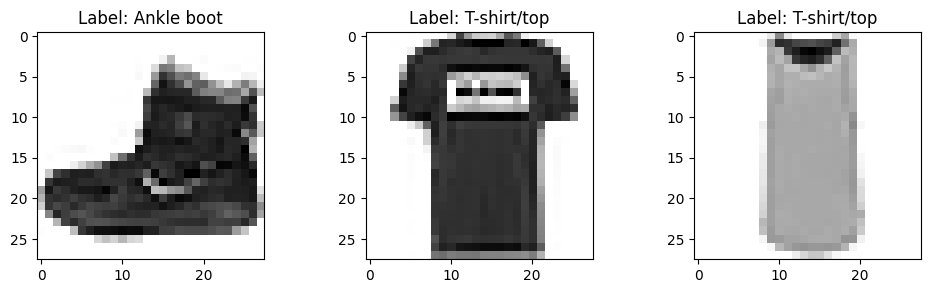

In [33]:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def show_image(img, label, ax):
    ax.imshow(img, cmap=plt.cm.binary)
    ax.set_title(f"Label: {class_names[label]}")  

fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for i in range(3):
    show_image(X_train[i], y_train[i], ax=axes[i])

plt.tight_layout()
plt.show()


# Preprocessing
Nous allons maintenant proc√©der √† la normalisation des donn√©es et √† l'encodage des labels. 

In [34]:
# Normalization
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)



# R√©gression Logistique

Notre premier mod√®le sera une √©quivalence de la r√©gression logistique. On utilise pour cela un mod√®le simple avec une seule couche de 10 neurones : un pour chaque classe. Cette couche poss√®de une activation <b>softmax</b> pour obtenir les probabilit√©es d'appartenance √† chaque classe.

Nous compilons ensuite le mod√®le en utilisant un algorithme d'optimisation (<b>adam</b>) pour minimiser la fonction de perte <b>categorical_crossentropy</b>. Comme sp√©cifi√© plus t√¥t, la m√©trique que l'on souhaite observer ici est la <b>pr√©cision</b>.

On entraine ensuite le mod√®le sur <b>10 epochs</b>, cela signifie que chaque observation sera utilis√©e 10 fois pour entra√Æner le mod√®le. On utilise un <b>batch_size de 32</b>, c'est √† dire que toutes les 32 observations, le mod√®le effectuera un passage arri√®re (<i>backward pass</i>) apr√®s avoir calculer la perte pour r√©tropropager le gradient et mettre √† jour les poids du mod√®le.  On effectue √©galement un split (10% de la base d'entra√Ænement) pour obtenir un jeu de validation afin d'observer <b>un √©ventuel sur-apprentissage</b>. 

In [36]:
# D√©finition du mod√®le
LR = Sequential([
    Flatten(input_shape=(28, 28),name='input'),
    Dense(10, activation='softmax',name='output')
], name='Regression_logistique')

LR.summary()
# Compilation du mod√®le
LR.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entra√Ænement du mod√®le avec l'ensemble de validation
history_LR = LR.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Model: "Regression_logistique"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 784)               0         
                                                                 
 output (Dense)              (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
1500/1500 [==============================] - 1s 800us/step - loss: 0.6277 - accuracy: 0.7907 - val_loss: 0.5034 - val_accuracy: 0.8248
Epoch 2/10
1500/1500 [==============================] - 1s 735us/step - loss: 0.4734 - accuracy: 0.8380 - val_loss: 0.4783 - val_accuracy: 0.8357
Epoch 3/10
1500/1500 [==============================] - 1s 784us/step - loss: 0.4449 - accuracy: 0.8476 - val_loss: 0.4473 - val_accuracy: 0.8453
Epoch 4/10
1500/1500 [==============================] - 1s 749us/step - loss: 0.4293 - accuracy: 0.8527 - val_loss: 0.4317 - val_accuracy: 0.8507
Epoch 5/10
1500/1500 [==============================] - 1s 747us/step - loss: 0.4180 - accuracy: 0.8559 - val_loss: 0.4309 - val_accuracy: 0.8546
Epoch 6/10
1500/1500 [==============================] - 1s 707us/step - loss: 0.4105 - accuracy: 0.8578 - val_loss: 0.4518 - val_accuracy: 0.8435
Epoch 7/10
1500/1500 [==============================] - 1s 711us/step - loss: 0.4053 - accuracy: 0.8584 - val_loss: 0.4197 -

# Evaluation 
Suite √† l'entrainement, nous pouvons observer nos deux fonctions de pertes (<i>Training et Validation</i>) pour regarder leur tendance respective.
<br>Nous voyons ici que la perte d'entra√Ænement <b>diminiue</b> au fil des <i>epochs</i>, c'est le comportement attendue puisque nous cherchons <b>√† la minimiser</b>.

La perte de validation quant √† elle, suit la m√™me tendance, c'est un signe que <b>le mod√®le s'am√©liore</b> et qu'il <b>g√©n√©ralise bien</b>.   

Nous testons ensuite notre mod√®le sur le jeu de donn√©es de test pour statuer de sa performance.
<br>On observe ici qu'avec <b>une pr√©cision de 84%</b> notre mod√®le est globalement bon, bien qu'il semble l√©g√®rement moins performer en test qu'en apprentissage, nous n'observons pas de sur-apprentissage ici.

Test accuracy: 0.84


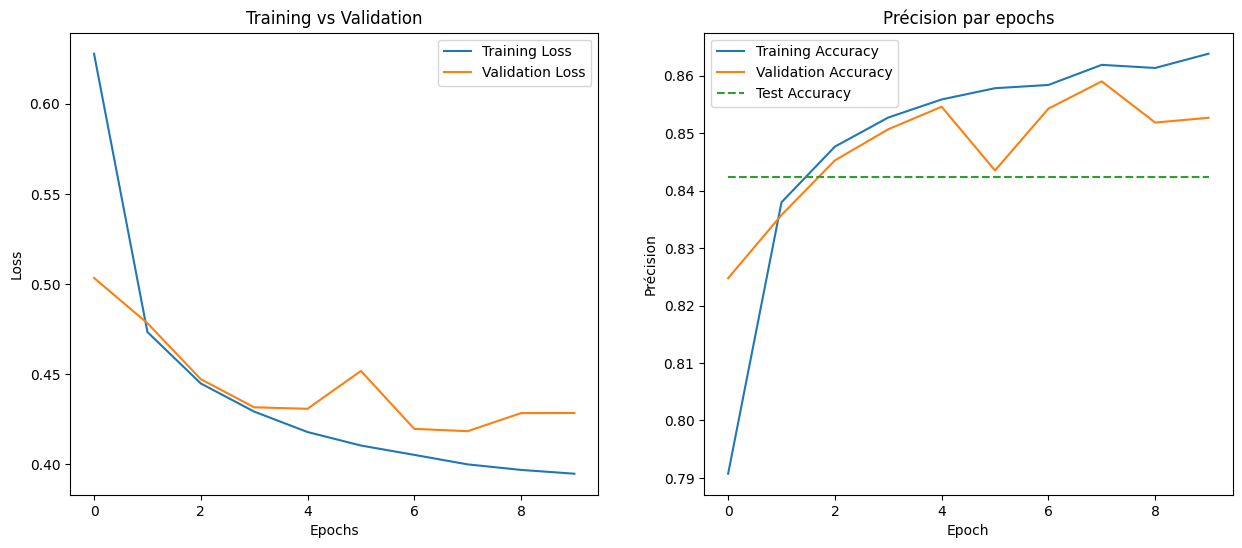

In [37]:
# Evaluer le mod√®le sur le jeu de donn√©es test
test_loss, test_accuracy = LR.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', round(test_accuracy,2))

plt.figure(figsize=(15, 6))
# Tracer les courbes de loss
plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes, position 2
plt.plot(history_LR.history['loss'], label='Training Loss')
plt.plot(history_LR.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Tracer les courbes de pr√©cision
plt.subplot(1, 2, 2)  # 1 ligne, 2 colonnes, position 2
plt.plot(history_LR.history['accuracy'], label='Training Accuracy')
plt.plot(history_LR.history['val_accuracy'], label='Validation Accuracy')
plt.plot(np.arange(len(history_LR.history['accuracy'])), [test_accuracy]*len(history_LR.history['accuracy']), label='Test Accuracy', linestyle='--')
#plt.axvline(x=8, color='r')
plt.title('Pr√©cision par epochs')
plt.xlabel('Epoch')
plt.ylabel('Pr√©cision')
plt.legend()

plt.show()




# Premier mod√®le MLP
Nous allons maintenant cr√©er notre premier mod√®le MLP, nous allons construire un mod√®le tr√®s simple avec 1 couche enti√®rement connect√© de 128 neurones et une couche de 10 neurones pour la sortie. 
<br>Les hyperparam√®tres utilis√©s seront √©galement tr√®s classique, on utilisera un <b>batch_size de 32</b>, <b>10 epochs</b> (chaque observation sera vue 10 fois pendant l'entra√Ænement), et un <b>learning_rate de 0.001</b> (c'est le learning_rate par d√©faut de l'optimiseur "adam"). (https://keras.io/api/optimizers/adam/)
<br>En guise de fonction d'activation pour notre couche cach√©e, nous utiliserons <b>'ReLU'</b> pour sa rapidit√©. 
<br>En sortie, on utilisera <b>'softmax'</b> pour obtenir les probabilit√©s d'appartenance √† chaque classe. 
<br>On utilisera <b>'categorial_crossentropy'</b> en fonction de perte car elle est adapt√©e √† notre probl√®me de <b>classification multiclasse</b>. 

In [40]:
# Construire le mod√®le MLP
MLP1 = Sequential([ 
    Flatten(input_shape=(28, 28),name='input'),
    Dense(128, activation = 'relu',name='hidden_1'), # couche cach√©e de 128 neurones
    Dense(10, activation = 'softmax',name='output')
],name='Modele_simple')

# Afficher le mod√®le
MLP1.summary()

# Compiler le mod√®le
MLP1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entra√Æner le mod√®le
history_MLP1 = MLP1.fit(X_train,
                    y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_split=0.2)



Model: "Modele_simple"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 784)               0         
                                                                 
 hidden_1 (Dense)            (None, 128)               100480    
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5224 - accuracy: 0.8174 - val_loss: 0.4536 - val_accuracy: 0.8401
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3911 - accuracy: 0.8596 - val_loss: 0.3838 - val_accuracy: 0.8620
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3503 - accuracy: 0.8716 - val_loss: 0.3504 - val_accuracy: 0.8742
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3233 - accuracy: 0.8826 - val_loss: 0.3436 - val_accuracy: 0.8756
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3045 - accuracy: 0.8872 - val_loss: 0.3502 - val_accuracy: 0.8749
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2888 - accuracy: 0.8937 - val_loss: 0.3378 - val_accuracy: 0.8769
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2769 - accuracy: 0.8982 - val_loss: 0.3308 - val_accuracy:

# Evaluation 
Ce premier mod√®le MLP <b>est meilleur</b> que le mod√®le pr√©c√©dent, nous obtenons une pr√©cision de <b>90% en apprentissage</b> et de <b>88% en test</b>.

313/313 [==============================] - 0s 833us/step - loss: 0.3379 - accuracy: 0.8855
Test accuracy: 0.886


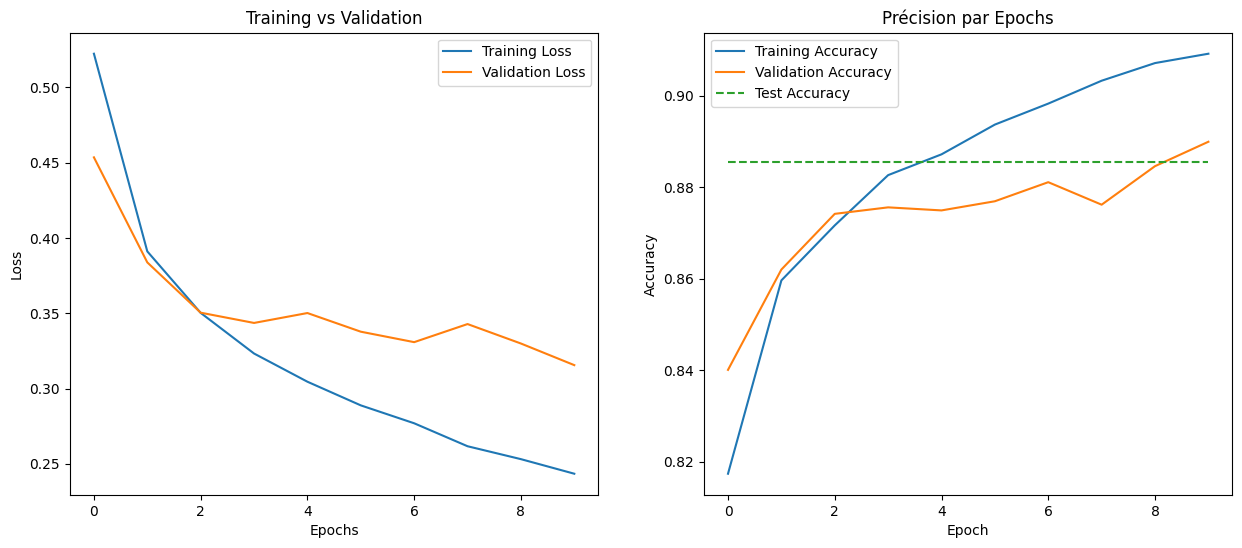

In [42]:
# √âvaluer le mod√®le
test_loss, test_acc = MLP1.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')

plt.figure(figsize=(15, 6))
# Tracer les courbes de loss
plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes, position 1
plt.plot(history_MLP1.history['loss'], label='Training Loss')
plt.plot(history_MLP1.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Courbes de pr√©cision
plt.subplot(1, 2, 2)  # 1 ligne, 2 colonnes, position 2
plt.plot(history_MLP1.history['accuracy'], label='Training Accuracy')
plt.plot(history_MLP1.history['val_accuracy'], label='Validation Accuracy')
plt.plot(np.arange(len(history_MLP1.history['accuracy'])), [test_acc]*len(history_MLP1.history['accuracy']), label='Test Accuracy', linestyle='--')
plt.title('Pr√©cision par Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Second mod√®le MLP

Nous allons construire un mod√®le plus profond, on utilisera 6 couches cach√©es avec un nombre de neurones d√©gressifs par couche.
<br>Notre nombre de param√®tres sera 15 fois plus grand (1 503 530 vs 101 770), on pourrait s'attendre √† de meilleurs r√©sultats

In [44]:
# Construire le mod√®le MLP complexe
MLP2 = Sequential([
    Flatten(input_shape=(28, 28),name='input'),
    Dense(1024,activation='relu',name='hiden_1'),  # Premi√®re couche cach√©e avec 1024 neurones
    Dense(512, activation='relu',name='hiden_2'),  # Deuxi√®me couche cach√©e avec 512 neurones
    Dense(256, activation='relu',name='hiden_3'),  # Troisi√®me couche cach√©e avec 256 neurones
    Dense(128, activation='relu',name='hiden_4'),  # Quatri√®me couche cach√©e avec 128 neurones
    Dense(64, activation='relu',name='hiden_5'),   # Cinqui√®me couche cach√©e avec 64 neurones
    Dense(32, activation='relu',name='hiden_6'),   # Sixi√®me couche cach√©e avec 32 neurones
    Dense(10, activation='softmax',name='output') # Couche de sortie avec 10 neurones pour les 10 classes
],name='MLP_profond')
MLP2.summary()
# Compiler le mod√®le
MLP2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entra√Æner le mod√®le
history_MLP2 = MLP2.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)



Model: "MLP_profond"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 784)               0         
                                                                 
 hiden_1 (Dense)             (None, 1024)              803840    
                                                                 
 hiden_2 (Dense)             (None, 512)               524800    
                                                                 
 hiden_3 (Dense)             (None, 256)               131328    
                                                                 
 hiden_4 (Dense)             (None, 128)               32896     
                                                                 
 hiden_5 (Dense)             (None, 64)                8256      
                                                                 
 hiden_6 (Dense)             (None, 32)                

# Evaluation 

Ce mod√®le, bien que beaucoup plus grand en terme de param√®tres, ne fournis <b>pas de r√©sultats satisfaisants</b>.
<br>Il est moins pr√©cis de <b>1%</b> par rapport au mod√®le plus simple (87% vs 88%).
<br>On peut dire que la taille ne semble pas compter ici ! üôÑ
<br>De plus le mod√®le, par sa taille, est <b>beaucoup plus √† s'ex√©cuter</b> (2min vs 19sec).

313/313 [==============================] - 1s 2ms/step - loss: 0.3681 - accuracy: 0.8766
Test accuracy: 0.877


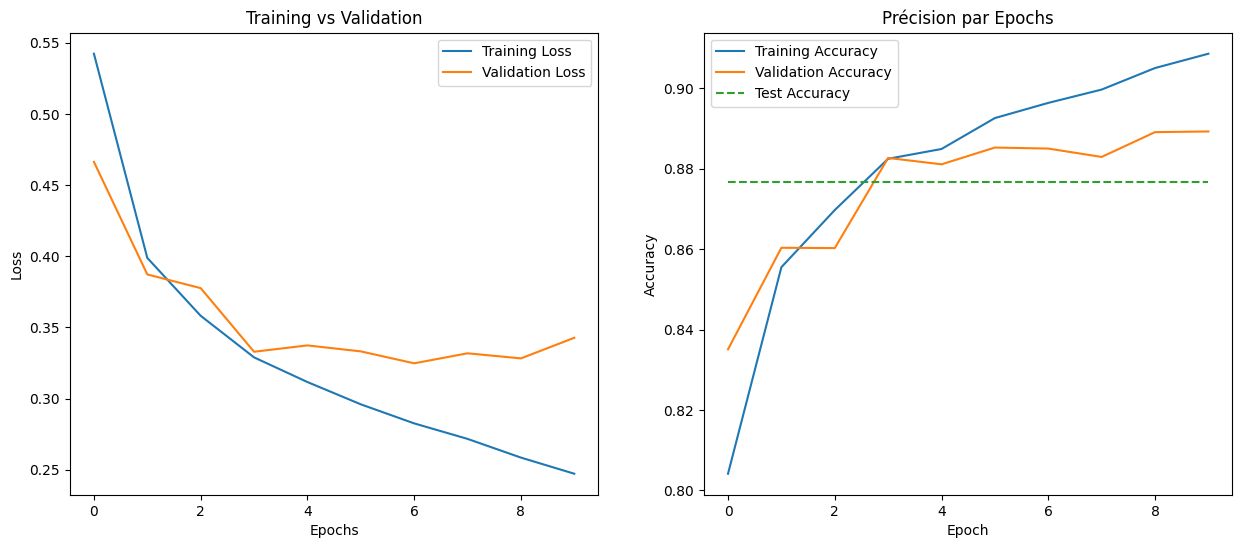

In [46]:
# √âvaluer le mod√®le
test_loss, test_acc = MLP2.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')

plt.figure(figsize=(15, 6))
# Tracer les courbes de loss
plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes, position 1
plt.plot(history_MLP2.history['loss'], label='Training Loss')
plt.plot(history_MLP2.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


# Courbes de pr√©cision
plt.subplot(1, 2, 2)  # 1 ligne, 2 colonnes, position 2
plt.plot(history_MLP2.history['accuracy'], label='Training Accuracy')
plt.plot(history_MLP2.history['val_accuracy'], label='Validation Accuracy')
plt.plot(np.arange(len(history_MLP2.history['accuracy'])), [test_acc]*len(history_MLP2.history['accuracy']), label='Test Accuracy', linestyle='--')
plt.title('Pr√©cision par Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Troisi√®me mod√®le MLP 
Nous avons vu que rajout√© des couches ne semblait pas √™tre une solution forc√©ment viable.
<br>Nous pouvons essayer de le r√©duire en rajoutant plus de neurones dans la couche cach√©e et de changer la fonction d'activation. 
<br>Avec une couche cach√©e de 512 neurones, le mod√®le a 4 fois plus de param√®tres que le premier mod√®le et environ 3 fois moins que le second.

In [51]:
# Construire le mod√®le MLP avec 6 couches cach√©es 
MLP3 = Sequential([
    Flatten(input_shape=(28, 28),name='input'),
    Dense(512,activation='tanh',name='hiden_1'),  # Premi√®re couche cach√©e avec 1024 neurones
    Dense(10, activation='softmax',name='output') # Couche de sortie avec 10 neurones pour les 10 classes
],name='MLP_tanh')

MLP3.summary()
# Compiler le mod√®le
MLP3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entra√Æner le mod√®le
history_MLP3 = MLP3.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Model: "MLP_tanh"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 784)               0         
                                                                 
 hiden_1 (Dense)             (None, 512)               401920    
                                                                 
 output (Dense)              (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)


Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4928 - accuracy: 0.8240 - val_loss: 0.4021 - val_accuracy: 0.8510
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3900 - accuracy: 0.8579 - val_loss: 0.3820 - val_accuracy: 0.8552
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3498 - accuracy: 0.8711 - val_loss: 0.3547 - val_accuracy: 0.8688
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3236 - accuracy: 0.8802 - val_loss: 0.3336 - val_accuracy: 0.8748
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3055 - accuracy: 0.8862 - val_loss: 0.3240 - val_accuracy: 0.8830
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2881 - accuracy: 0.8928 - val_loss: 0.3287 - val_accuracy: 0.8804

# Evaluation 
Le mod√®le atteint des performances sensiblement similaires aux deux mod√®les pr√©c√©dents avec une pr√©cision de 87%.

313/313 [==============================] - 0s 1ms/step - loss: 0.3486 - accuracy: 0.8776
Test accuracy: 0.878


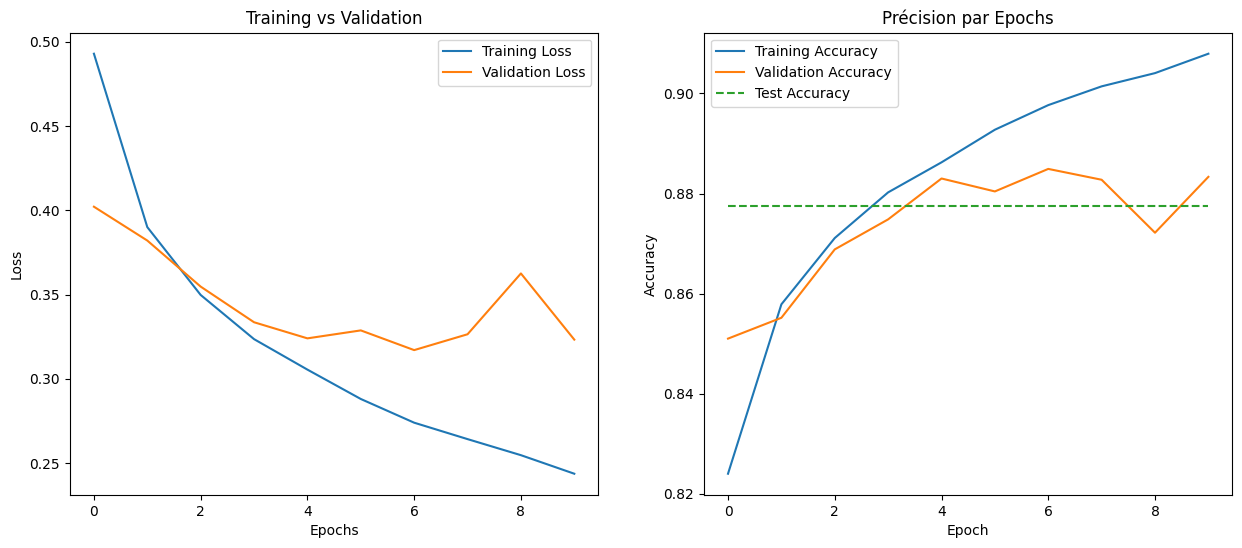

In [52]:
# √âvaluer le mod√®le
test_loss, test_acc = MLP3.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')

plt.figure(figsize=(15, 6))
# Tracer les courbes de loss
plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes, position 1
plt.plot(history_MLP3.history['loss'], label='Training Loss')
plt.plot(history_MLP3.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


# Courbes de pr√©cision
plt.subplot(1, 2, 2)  # 1 ligne, 2 colonnes, position 2
plt.plot(history_MLP3.history['accuracy'], label='Training Accuracy')
plt.plot(history_MLP3.history['val_accuracy'], label='Validation Accuracy')
plt.plot(np.arange(len(history_MLP3.history['accuracy'])), [test_acc]*len(history_MLP3.history['accuracy']), label='Test Accuracy', linestyle='--')
plt.title('Pr√©cision par Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Commentaire partie MLP 
Nous pourrions essayer d'optimiser en it√©rant encore et encore sur l'architecture du mod√®le ou bien tester d'autres param√®tres comme <b>le learning rate</b> ou <b>le nombre d'epochs</b> pour obtenir de meilleurs r√©sultats.
<br>Nous ne le ferons pas car il existe un autre type de r√©seau plus performant pour la classification d'image, le <b>Convutionnal Neural Network</b>
<br>Ainsi nous prendrons en r√©f√©rence le premier mod√®le MLP √† une couche atteignant une <b>pr√©cision de 88%</b>. Nous aimerions pouvoir passer la barre de 90% avec ce type de mod√®le. 

# Le CNN 
Ce type de mod√®le utilise de nouvelles couches : de <b>convulation</b> et de <b>pooling</b>. 
<br>Le but est de cr√©er des filtres qui vont <i>zoomer</i> (en faisant une carte des caract√©ristiques) sur une image pour en construire de nouvelles.
<br>Ensuite, nous allons extraire les caract√©ristiques principales via une couche de <i>pooling</i>.
<br>Nous utiliserons ici de la <b>convulation 2D</b> et le <b>MaxPooling 2D</b>

In [53]:
#preprocess pour les niveaux de gris 
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Premier mod√®le CNN
Pour notre premier mod√®le CNN, on test un mod√®le simple. 
<br>On commence par une couche de convolution avec 32 filtres de taille 3x3 sur notre image d'entr√©e de taille 28x28 pixels avec un MaxPooling 2x2.
<p>Comme mentionn√© pr√©c√©demment, l'objectif est d'extraire les caract√©ristiques, dans notre cas, les caract√©ristiques sp√©cifiques des v√™tements. Ces filtres vont donc permettrent de diff√©rencier un t-shirt d'une chaussure. </p>
<p>Ensuite, la couche de MaxPooling intervient. Le but principal de cette couche est de r√©duire la dimensionnalit√© des cartes de caract√©ristiques tout en conservant les informations les plus importantes. Elle op√®re en examinant des fen√™tres de taille 2x2 sur chaque carte de caract√©ristique et en conservant la valeur maximale de chaque fen√™tre. Cela a pour effet de r√©duire par quatre la taille de chaque carte de caract√©ristiques (r√©duisant ainsi la hauteur et la largeur de moiti√©), car seule la valeur maximale dans chaque fen√™tre de 2x2 est conserv√©e.</p>
<p>On <i>aplatit</i> ensuite ces cartes de caract√©ristiques en un vecteur au format lin√©aire pour la couche suivante. 

In [71]:
CNN1 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape, name='Conv2D_input'),
    MaxPooling2D(pool_size=(2, 2), name='MaxPooling2D'),
    Flatten(name='Flatten'),
    Dense(128, activation='relu', name='hidden_layer_fully_connected'),
    Dense(10, activation='softmax', name='Output')
],name='CNN_1')

CNN1.summary()
CNN1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#model.fit(X_train, Y_train,batch_size=batch_size, nb_epoch=nb_epoch,verbose=1, validation_data=(X_test, Y_test))
history_CNN1 = CNN1.fit(X_train, y_train,batch_size=32, epochs=10,verbose=1,validation_split=0.2)

Model: "CNN_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D_input (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 MaxPooling2D (MaxPooling2D  (None, 13, 13, 32)        0         
 )                                                               
                                                                 
 Flatten (Flatten)           (None, 5408)              0         
                                                                 
 hidden_layer_fully_connect  (None, 128)               692352    
 ed (Dense)                                                      


                                                                 
 Output (Dense)              (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.4105 - accuracy: 0.8549 - val_loss: 0.3264 - val_accuracy: 0.8814
Epoch 2/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.2756 - accuracy: 0.9007 - val_loss: 0.2855 - val_accuracy: 0.8965
Epoch 3/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.2326 - accuracy: 0.9146 - val_loss: 0.2473 - val_accuracy: 0.9102
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1973 - accuracy: 0.9270 - val_loss: 0.2696 - val_accuracy: 0.9064
Epoch 5/10
1500/1500 [==============================] 

# Evaluation 
Ce mod√®le CNN est satisfaisant, nous avons obtenu les <b>meilleurs r√©sultats</b> jusqu'ici avec une pr√©cision de <b>90% en test</b>. 
<br>On remarque toutefois un <b>√©cart</b> entre l'apprentissage et le test (97% vs 90%).
<br>Nous pouvons tenter d'y rem√©dier en ins√©rant du <b>dropout</b> dans le mod√®le.
Le <i>dropout</i> consiste √† mettre √† 0 de mani√®re al√©atoire une portion d√©finie des poids dans le r√©seau.

313/313 [==============================] - 1s 2ms/step - loss: 0.3383 - accuracy: 0.9090
Test accuracy: 90.90%


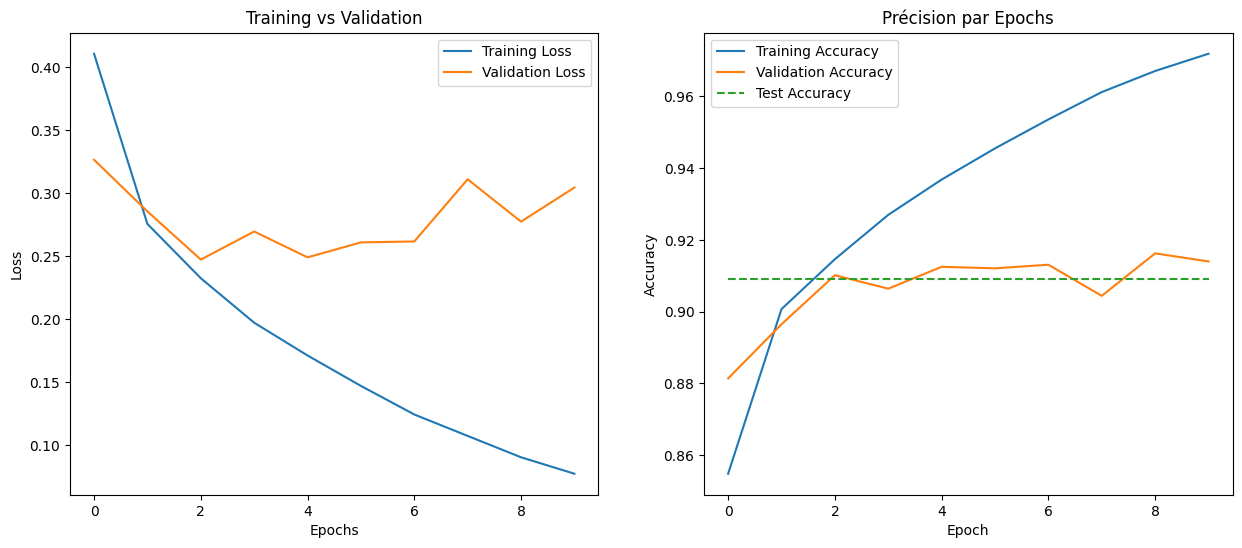

In [73]:
# √âvaluer le mod√®le
test_loss, test_acc = CNN1.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc*100:.2f}%')

plt.figure(figsize=(15, 6))
# Tracer les courbes de loss
plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes, position 1
plt.plot(history_CNN1.history['loss'], label='Training Loss')
plt.plot(history_CNN1.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


# Courbes de pr√©cision
plt.subplot(1, 2, 2)  # 1 ligne, 2 colonnes, position 2
plt.plot(history_CNN1.history['accuracy'], label='Training Accuracy')
plt.plot(history_CNN1.history['val_accuracy'], label='Validation Accuracy')
plt.plot(np.arange(len(history_CNN1.history['accuracy'])), [test_acc]*len(history_CNN1.history['accuracy']), label='Test Accuracy', linestyle='--')
plt.title('Pr√©cision par Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Second mod√®le CNN

On ajoute du <i>dropout</i> pour r√©duire le l√©ger sur-apprentisage vu sur le mod√®le pr√©c√©dent.

In [64]:
CNN2 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape, name='Conv2D_input'),
    Dropout(0.25),
    MaxPooling2D(pool_size=(2, 2), name='MaxPooling2D'),
    Dropout(0.5),
    Flatten(name='Flatten'),
    Dense(128, activation='relu', name='hidden_layer_fully_connected'),
    Dense(10, activation='softmax', name='Output')
],name='CNN_2')

CNN2.summary()
CNN2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#model.fit(X_train, Y_train,batch_size=batch_size, nb_epoch=nb_epoch,verbose=1, validation_data=(X_test, Y_test))
history_CNN2 = CNN2.fit(X_train, y_train,batch_size=32, epochs=10,verbose=1,validation_split=0.2)

Model: "CNN_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D_input (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 dropout_4 (Dropout)         (None, 26, 26, 32)        0         
                                                                 
 MaxPooling2D (MaxPooling2D  (None, 13, 13, 32)        0         
 )                                                               
                                                                 
 dropout_5 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 Flatten (Flatten)           (None, 5408)              0         
                                                                 
 hidden_layer_fully_connect  (None, 128)               692352    
 ed (Dense)                                                  

# Evaluation 
Nous avons r√©ussi √† r√©duire le l√©ger sur-apprentissage sans d√©grader les performances du mod√®le en test √† l'aide du dropout.
On observe ici une pr√©cision de 93% en apprentissage et 91% en test. Le mod√®le est m√™me l√©g√®rement meilleur que le pr√©c√©dent.

313/313 [==============================] - 1s 2ms/step - loss: 0.2450 - accuracy: 0.9119
Test accuracy: 91.19%


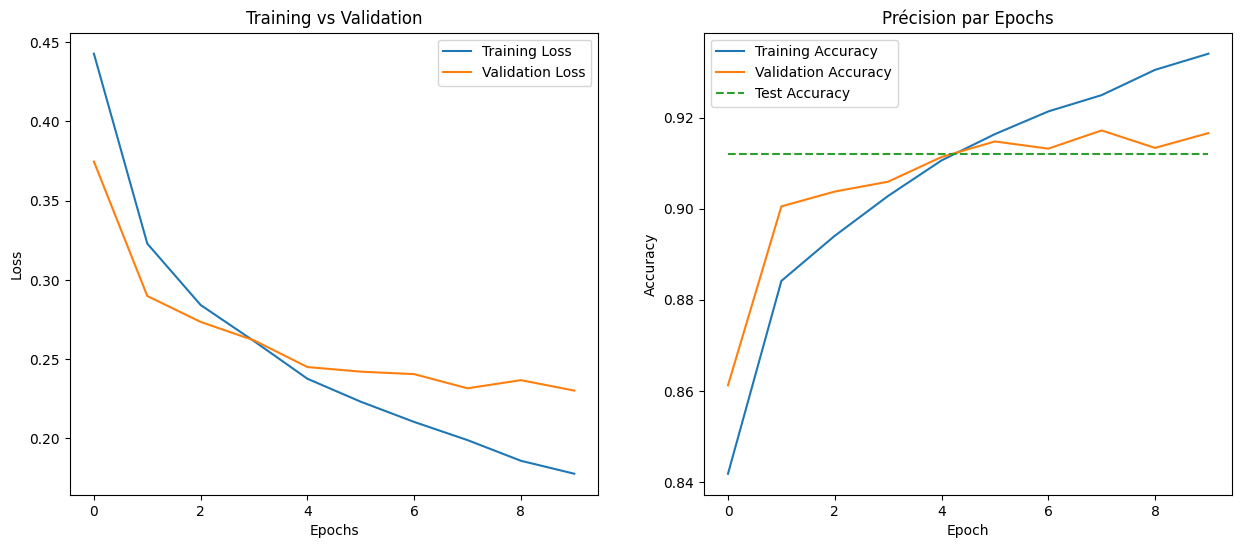

In [69]:
# √âvaluer le mod√®le
test_loss, test_acc = CNN2.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc*100:.2f}%')

plt.figure(figsize=(15, 6))
# Tracer les courbes de loss
plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes, position 1
plt.plot(history_CNN2.history['loss'], label='Training Loss')
plt.plot(history_CNN2.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


# Courbes de pr√©cision
plt.subplot(1, 2, 2)  # 1 ligne, 2 colonnes, position 2
plt.plot(history_CNN2.history['accuracy'], label='Training Accuracy')
plt.plot(history_CNN2.history['val_accuracy'], label='Validation Accuracy')
plt.plot(np.arange(len(history_CNN2.history['accuracy'])), [test_acc]*len(history_CNN2.history['accuracy']), label='Test Accuracy', linestyle='--')
plt.title('Pr√©cision par Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Troisi√®me mod√®le CNN
Pour ce troisi√®me mod√®le, nous allons utiliser 5 couches de convolutions. 
<br>Nous allons √©galement introduire un nouveau param√®tre pour ces couches en utilisant <b>"padding = same"</b>
<br>Ce param√®tre permet de <b>conserver les dimensions</b> de l'image dans la carte des caract√©ristiques. En effet, dans les mod√®les pr√©c√©dent, le padding par d√©faut valait <i>"valid"</i>, ce param√®tre r√©duisait de 2x2 la carte par rapport √† l'image (la carte avait donc une dimension 26x26 d√®s la premi√®re couche)

In [108]:
CNN3 = Sequential([
    Conv2D(32, (3, 3), padding='valid', activation='relu', input_shape=input_shape),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    Flatten(),
    
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
], name='CNN_3')

CNN3.summary()
CNN3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history_CNN3 = CNN3.fit(X_train, y_train,batch_size=32, epochs=10,verbose=1,validation_split=0.2)


Model: "CNN_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_57 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 12, 12, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_28 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 conv2d_58 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 conv2d_59 (Conv2D)          (None, 10, 10, 64)        36928     
                                                             

1500/1500 [==============================] - 45s 29ms/step - loss: 0.6236 - accuracy: 0.7721 - val_loss: 0.3727 - val_accuracy: 0.8564
Epoch 2/10
1500/1500 [==============================] - 43s 29ms/step - loss: 0.3900 - accuracy: 0.8595 - val_loss: 0.3010 - val_accuracy: 0.8906
Epoch 3/10
1500/1500 [==============================] - 42s 28ms/step - loss: 0.3262 - accuracy: 0.8831 - val_loss: 0.2771 - val_accuracy: 0.9012
Epoch 4/10
1500/1500 [==============================] - 42s 28ms/step - loss: 0.2944 - accuracy: 0.8943 - val_loss: 0.2527 - val_accuracy: 0.9075
Epoch 5/10
1500/1500 [==============================] - 42s 28ms/step - loss: 0.2716 - accuracy: 0.9030 - val_loss: 0.2503 - val_accuracy: 0.9088
Epoch 6/10
1500/1500 [==============================] - 43s 28ms/step - loss: 0.2521 - accuracy: 0.9096 - val_loss: 0.2451 - val_accuracy: 0.9095
Epoch 7/10
1500/1500 [==============================] - 43s 29ms/step - loss: 0.2416 - accuracy: 0.9121 - val_loss: 0.2332 - val_accura

# Evaluation
Bien que le nombre de couches et de filtres soit sup√©rieur, le mod√®le n'est pas meilleur que le pr√©c√©dent. (91.19% vs 91.21% de pr√©cision)

313/313 [==============================] - 3s 9ms/step - loss: 0.2440 - accuracy: 0.9121
Test accuracy: 91.21%


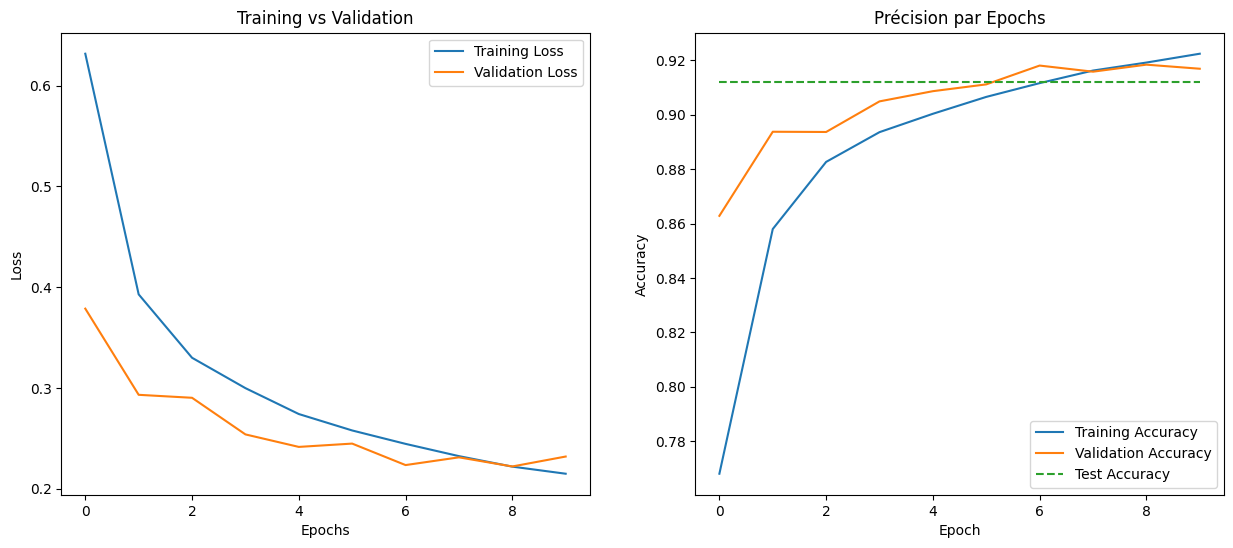

In [89]:
# √âvaluer le mod√®le
test_loss, test_acc = CNN3.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc*100:.2f}%')

plt.figure(figsize=(15, 6))
# Tracer les courbes de loss
plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes, position 1
plt.plot(history_CNN3.history['loss'], label='Training Loss')
plt.plot(history_CNN3.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


# Courbes de pr√©cision
plt.subplot(1, 2, 2)  # 1 ligne, 2 colonnes, position 2
plt.plot(history_CNN3.history['accuracy'], label='Training Accuracy')
plt.plot(history_CNN3.history['val_accuracy'], label='Validation Accuracy')
plt.plot(np.arange(len(history_CNN3.history['accuracy'])), [test_acc]*len(history_CNN3.history['accuracy']), label='Test Accuracy', linestyle='--')
plt.title('Pr√©cision par Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Quatri√®me mod√®le CNN

Nous pouvons pr√©sumer qu'il y avait peut-√™tre "trop" de couches et que le mod√®le n'arriait pas √† capter des informations lui permettant de s'am√©liorer. 
Nous allons essayer de le r√©duire un peu. 

In [91]:
CNN4 = Sequential([
    Conv2D(32, (3, 3), padding='valid', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.25),
    
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    Flatten(),
    
    
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')    
],name='CNN_4')

CNN4.summary()
CNN4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_CNN4 = CNN4.fit(X_train, y_train,batch_size=32, epochs=10,verbose=1,validation_split=0.2)


Model: "CNN_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_38 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 dropout_20 (Dropout)        (None, 6, 6, 64)          0         
                                                                 
 conv2d_39 (Conv2D)          (None, 6, 6, 128)         73856 

# Evaluation 
Le mod√®le est l√©g√®rement meilleur que le pr√©c√©dent (92.08% vs 91.21%). C'est notre meilleur mod√®le jusqu'ici.

313/313 [==============================] - 2s 5ms/step - loss: 0.2271 - accuracy: 0.9208
Test accuracy: 92.08%


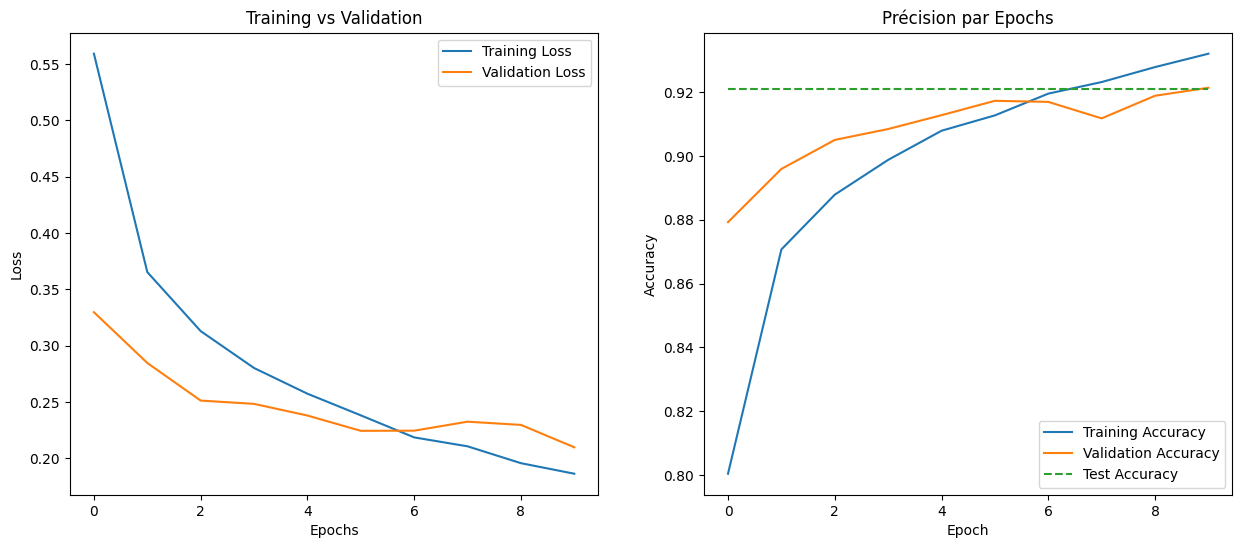

In [92]:
# √âvaluer le mod√®le
test_loss, test_acc = CNN4.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc*100:.2f}%')

plt.figure(figsize=(15, 6))
# Tracer les courbes de loss
plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes, position 1
plt.plot(history_CNN4.history['loss'], label='Training Loss')
plt.plot(history_CNN4.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


# Courbes de pr√©cision
plt.subplot(1, 2, 2)  # 1 ligne, 2 colonnes, position 2
plt.plot(history_CNN4.history['accuracy'], label='Training Accuracy')
plt.plot(history_CNN4.history['val_accuracy'], label='Validation Accuracy')
plt.plot(np.arange(len(history_CNN4.history['accuracy'])), [test_acc]*len(history_CNN4.history['accuracy']), label='Test Accuracy', linestyle='--')
plt.title('Pr√©cision par Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [98]:
CNN5 = Sequential([
    Conv2D(32, (3, 3), padding='valid', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    Flatten(),
    

    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')    
],name='CNN_5')

CNN5.summary()
CNN5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_CNN5 = CNN5.fit(X_train, y_train,batch_size=32, epochs=20,verbose=1,validation_split=0.2)

Model: "CNN_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_50 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 6, 6, 64)          0         


 ng2D)                                                           
                                                                 
 dropout_26 (Dropout)        (None, 6, 6, 64)          0         
                                                                 
 conv2d_51 (Conv2D)          (None, 6, 6, 128)         73856     
                                                                 
 flatten_14 (Flatten)        (None, 4608)              0         
                                                                 
 dense_27 (Dense)            (None, 128)               589952    
                                                                 
 dropout_27 (Dropout)        (None, 128)               0         
                                                                 
 dense_28 (Dense)            (None, 10)                1290      
                                                                 
Total params: 683914 (2.61 MB)
Trainable params: 683914 (2.61 MB)
Non-traina

# Evaluation 
En ayant augment√© le nombre d'epochs de 10 √† 20, le mod√®le ne donne pas de meilleurs r√©sultats (91% vs 92%).
En conclusion, il faut s'y prendre autrement.

313/313 [==============================] - 2s 5ms/step - loss: 0.2601 - accuracy: 0.9129
Test accuracy: 91.29%


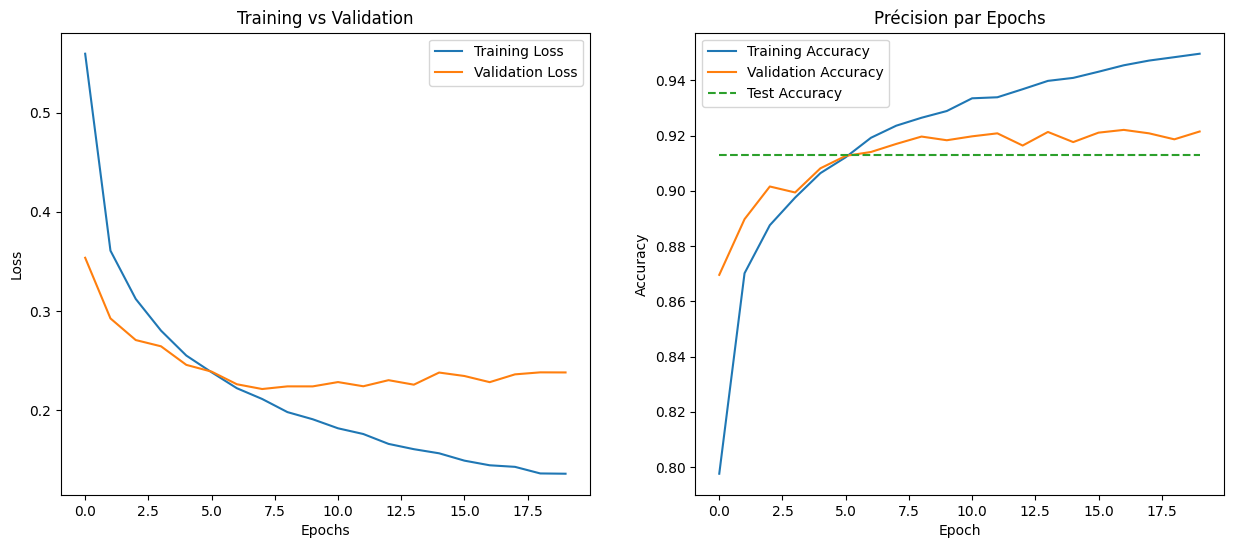

In [102]:
# √âvaluer le mod√®le
test_loss, test_acc = CNN5.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc*100:.2f}%')

plt.figure(figsize=(15, 6))
# Tracer les courbes de loss
plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes, position 1
plt.plot(history_CNN5.history['loss'], label='Training Loss')
plt.plot(history_CNN5.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


# Courbes de pr√©cision
plt.subplot(1, 2, 2)  # 1 ligne, 2 colonnes, position 2
plt.plot(history_CNN5.history['accuracy'], label='Training Accuracy')
plt.plot(history_CNN5.history['val_accuracy'], label='Validation Accuracy')
plt.plot(np.arange(len(history_CNN5.history['accuracy'])), [test_acc]*len(history_CNN5.history['accuracy']), label='Test Accuracy', linestyle='--')
plt.title('Pr√©cision par Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Visualisations suppl√©mentaires de r√©sultats du meilleur mod√®le (CNN4)
Nous pouvons visualiser la matrice de confusion de notre meilleur mod√®le, nous pouvons ainsi visualiser les potentielles confusions commisent par le mod√®le. 

 12/313 [>.............................] - ETA: 1s

c:\Users\hosfa\Documents\DeeplearningMEDAS\env_name\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


 45/313 [===>..........................] - ETA: 1s

313/313 [==============================] - 2s 5ms/step
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


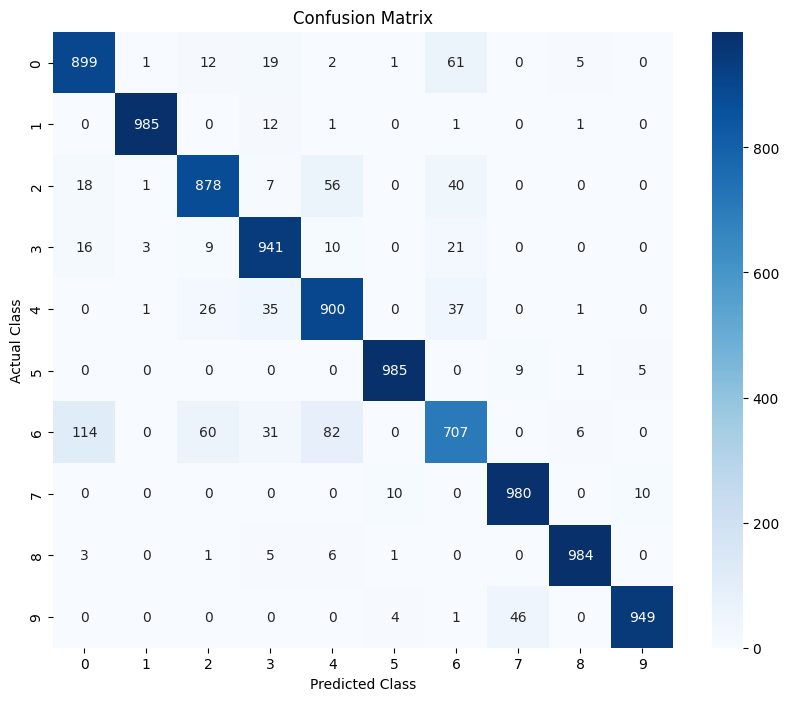

In [109]:
CNN4.save('CNN4.h5')
y_sigmoid = CNN4.predict(X_test)
y_pred = np.argmax(y_sigmoid, axis=-1)
y_test_class = np.argmax(y_test, axis=-1)

print(class_names)

cm = confusion_matrix(y_test_class, y_pred)


plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()


<p>Nous pouvons faire quelques commentaires sur la matrice, nous voyons notamment que le mod√®le se trompe souvent entre les <b>T-shirt(0)</b> et les <b>chemises(6)</b>. Les <b>robes</b> sont elles aussi confondues avec les <b>chemises</b>.</p>
<p>La classe la moins bien pr√©dite est de ce fait la classe 6 avec <b>seulement 707 observations</b> bien class√©s alors que les autres d√©passent souvent le seuil des 900 observations bien class√©es. 
A titre personnel, je suis √©tonn√© de voir que le mod√®le a du mal √† diff√©rencier une chemise d'un t-shirt, mais qu'il arrive sans probl√®me √† diff√©rencier une sneaker, d'une sandale et d'une bottine. 

### Voir les bonnes pr√©dictions

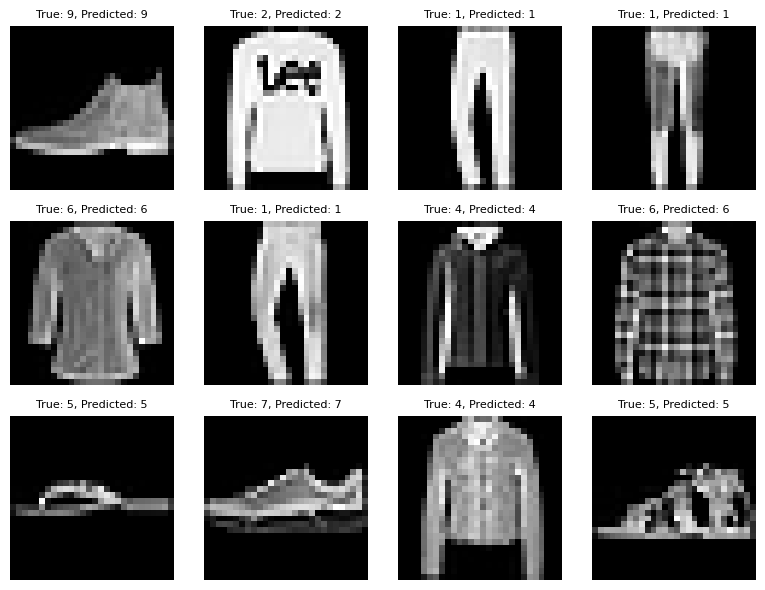

In [106]:
num_images = 12
num_cols = 4
num_rows = num_images // num_cols

plt.figure(figsize=(2 * num_cols, 2 * num_rows))

for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(X_test[i], cmap='gray')  
    
    plt.title(f"True: {y_test_class[i]}, Predicted: {y_pred[i]}", fontsize=8)
    plt.axis('off')

plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.tight_layout()
plt.show()

### Voir les images o√π le mod√®le se trompe

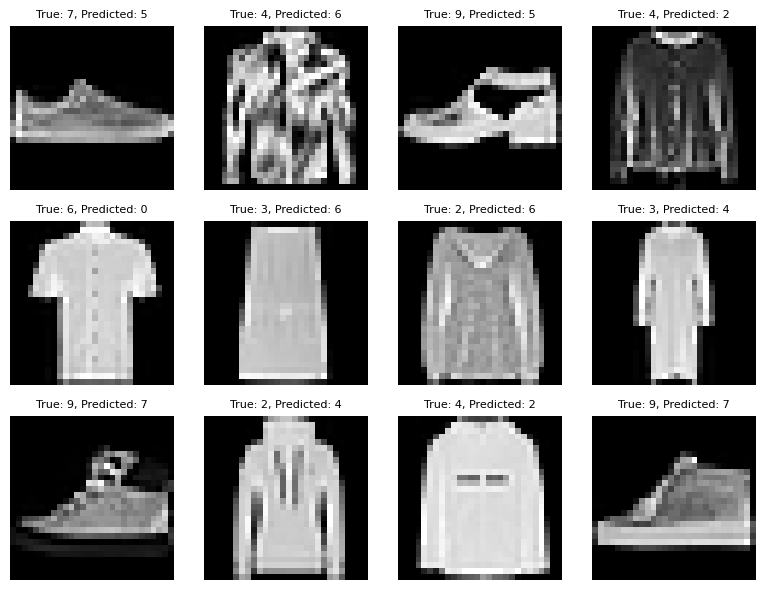

In [107]:
incorrect_indices = np.where(y_pred != y_test_class)[0]
num_images = 12 
if len(incorrect_indices) < num_images:
    num_images = len(incorrect_indices)

num_cols = 4
num_rows = num_images // num_cols + (num_images % num_cols > 0)


plt.figure(figsize=(2 * num_cols, 2 * num_rows))

for i in range(num_images):
    idx = incorrect_indices[i] 
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(X_test[idx], cmap='gray') 
    plt.title(f"True: {y_test_class[idx]}, Predicted: {y_pred[idx]}", fontsize=8)
    plt.axis('off')

plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.tight_layout()
plt.show()

# Mot de la fin / Pour aller plus loin

<p>Pour aller plus loin, nous pourrions utiliser la fonctionnalit√© <b>Hyperband</b> fournis par Keras. 
Cette fonction permet de faire une <b>recherche optimale des param√®tres</b> en fonction d'un <b>crit√®re</b>, par exemple, la pr√©cision. 
Ce processus it√©ratif va tester une combinaison de param√®tres en r√©alisant plusieurs mod√®les en parral√®le et abandonnera ceux qui ne semblent pas pertinent pour maximiser le crit√®re choisi. </p>
<p>De plus, il faudrait √©galement tester les <b>diff√©rentes fonctions de pertes et d'activation disponibles</b> mais aussi utiliser une validation crois√©e. En effet, les r√©sultats obtenus dans ce TP viennent d'un seul mod√®le, cependant <b>le processus stochastique</b> de la descente de gradient implique que mes r√©sultats sont les miens √† <b>l'instant T</b>. Une meilleure m√©trique serait <b>la moyenne de la pr√©cision</b> sur un ensemble de mod√®le. </p>

<p>Je ne le lancerai pas dans ce projet par manque de ressources, c'est un processus tr√®s long. </p>
<p>Par ailleurs, les r√©sultats obtenus ne seraient peut-√™tre pas forc√©ment bien meilleur, il s√ªrement n√©cessaire de changer de type de r√©seaux pour obtenir de meilleures performances sur le jeu de donn√©es Fashion-MNIST.</p>

In [ ]:
def build_model(hp):
    model = Sequential([
        Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1)),
        
        Conv2D(64, (3, 3), padding='same', activation='relu'),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)),
        
        Conv2D(128, (3, 3), padding='same', activation='relu'),
        Conv2D(128, (3, 3), activation='relu'),
        Flatten(),
        
        Dense(128, activation='relu'),
        Dropout(hp.Float('dropout_3', min_value=0.1, max_value=0.5, step=0.1)),
        Dense(10, activation='softmax')
    ])
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Hyperband
tuner = Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=50,
    executions_per_trial=2,
    directory='models',
    project_name='Fashion_MNIST_hyperband'
)

# Recherche des meilleurs hyperparam√®tres
tuner.search(X_train, y_train, validation_split=0.2, batch_size=32)

# Affichage des meilleurs hyperparam√®tres
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_epoch = tuner.get_best_models(num_models=1)[0].history.epoch[-1] + 1
print(f"Best learning rate: {best_hps.get('learning_rate')}")
print(f"Best dropout 1 rate: {best_hps.get('dropout_1')}")
print(f"Best dropout 2 rate: {best_hps.get('dropout_2')}")
print(f"Best dropout 3 rate: {best_hps.get('dropout_3')}")
print(f"Best number of epochs: {best_epoch}")
